In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year','origin'] 

In [45]:
raw_dataset = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/auto-mpg.data", sep = ' ', comment = '\t', skipinitialspace = True, na_values = '?', names = columns)

In [46]:
raw_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [47]:
raw_dataset.shape

(398, 8)

**Data Wrangling**

In [48]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [49]:
raw_dataset['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [50]:
# Replace by mean 
np.round(raw_dataset['horsepower'].mean())

104.0

In [51]:
raw_dataset['horsepower'].replace(np.nan, np.round(raw_dataset['horsepower'].mean()), inplace = True)

In [52]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [53]:
raw_dataset['origin'].unique()

array([1, 3, 2])

In [54]:
origin = pd.get_dummies(raw_dataset['origin'])

In [55]:
origin

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [56]:
# concatenate multiple dataframes
mpg_df = pd.concat([raw_dataset, origin], axis = 1)

In [57]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1,0,0


In [58]:
mpg_df.rename({1 : 'USA', 2 : 'Europe', 3 : 'Japan'}, axis = 1, inplace = True)

In [59]:
mpg_df.drop(['origin'], axis = 1, inplace = True)

In [60]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


**Correlation**

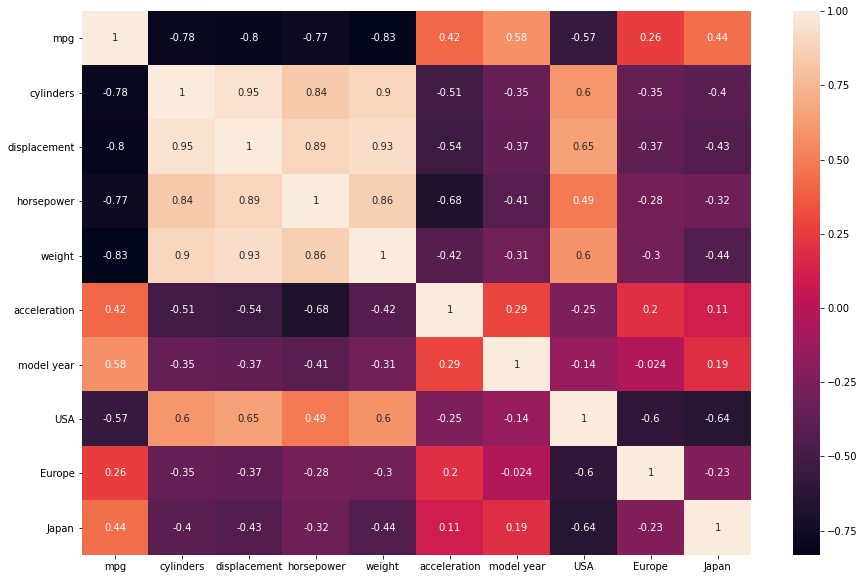

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(mpg_df.corr(), annot = True)

**Split Data into X & Y**

In [62]:
X = mpg_df.drop("mpg", axis = 1)
Y = mpg_df['mpg']

**Pre-Processing of Dataset**

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
# Applying Transformation
scaler_X = scaler.transform(X)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 9)

**ANN Regression**

In [66]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

In [67]:
def build_model():
  model = Sequential()
  # Input Layer
  # units = num. of neurons, input shape = shape of features
  model.add(Dense(units = 64, activation='relu',input_shape = [len(X.keys())]))

  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))

  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))

  # Output Layer
  # Activation Function - Linear
  model.add(Dense(units = 1))

  # Optimizers
  # Learning rate = 'alpha'
  optimizers = RMSprop(learning_rate= 0.0001)

  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                                'mean_absolute_error'])
  return model

In [68]:
model = build_model()

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 15% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
history = model.fit(X_train, Y_train, epochs = 600, batch_size= 20, validation_split = 0.15)

Epoch 1/600
14/14 [==============================] - 1s 30ms/step - loss: 615.2496 - mean_squared_error: 615.2496 - mean_absolute_error: 23.5189 - val_loss: 659.1953 - val_mean_squared_error: 659.1953 - val_mean_absolute_error: 24.5614
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 581.0231 - mean_squared_error: 581.0231 - mean_absolute_error: 22.8452 - val_loss: 650.1104 - val_mean_squared_error: 650.1104 - val_mean_absolute_error: 24.3735
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 550.7668 - mean_squared_error: 550.7668 - mean_absolute_error: 22.2631 - val_loss: 640.7672 - val_mean_squared_error: 640.7672 - val_mean_absolute_error: 24.1774
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 575.4634 - mean_squared_error: 575.4634 - mean_absolute_error: 22.9112 - val_loss: 630.3962 - val_mean_squared_error: 630.3962 - val_mean_absolute_error: 23.9590
Epoch 5/600
14/14 [==============================] - 0s 6ms

In [71]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']]

,mean_squared_error,val_mean_squared_error
0,602.103394,659.195251
1,593.244446,650.110413
2,584.611572,640.767151
3,575.354980,630.396240
4,565.051086,618.972412
...,...,...
595,5.920498,5.383354
596,5.840498,5.220421
597,5.909324,5.204425
598,5.860942,5.281122


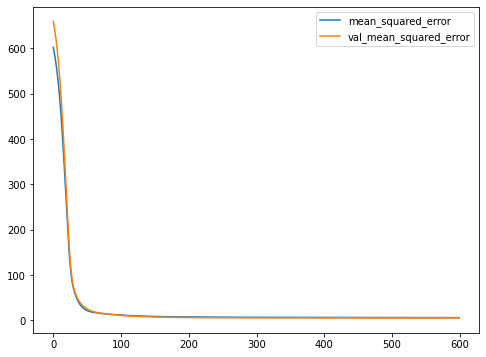

In [72]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot(figsize = (8,6))

In [73]:
predictions = model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.8972250480103556

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,predictions)

6.732246894000204

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,predictions)

1.8929092168807984

In [ ]:
model.weights

**Make a New Prediction**

In [78]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [79]:
X_New = [[4,	357.0,	130.0,	2504.0,	12.0,	70,	1,	0,	0]]

In [80]:
scaler_New = scaler.transform(X_New)

In [81]:
model.predict(scaler_New)

array([[20.195206]], dtype=float32)

In [82]:
np.round(model.predict(scaler_New))

array([[20.]], dtype=float32)